In [340]:
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates

pd.set_option('display.width', 1000)

In [341]:
yf.pdr_override()

In [342]:
start = '2022-01-01'
end = '2022-12-31'
data = pdr.get_data_yahoo('005930.KS', start=start, end=end)
data.drop('Adj Close', axis=1, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [343]:
data['Prev_close'] = data['Close'].shift()
data['Rate'] = (data['Close'] - data['Prev_close']) / data['Prev_close'] * 100
data['Rate'][0] = (data['Close'][0] - data['Open'][0]) / data['Open'][0] * 100
data['Rate'] = data['Rate'].round(decimals=2)

data.reset_index(inplace=True)
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
data.set_index(data['Date'], inplace=True)
data.drop(['Date', 'Prev_close'], axis=1, inplace=True)

c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


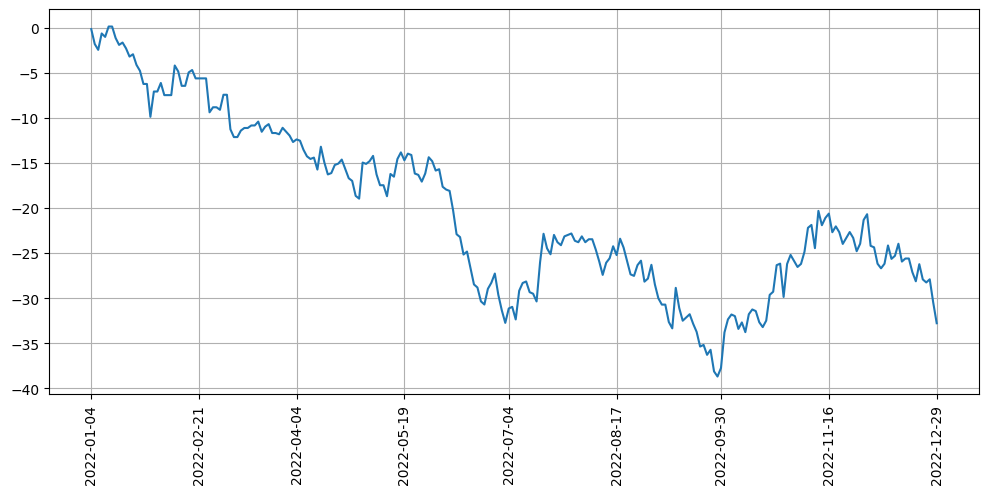

In [344]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Rate'].cumsum())
plt.grid()
plt.xticks(rotation=90)
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))
plt.show()

In [345]:
window_size = 20
data_rolling = data['Close'].rolling(window_size, min_periods=1)
data[f'MA_{window_size}'] = data_rolling.mean().astype(np.int32)

In [346]:
data['Upper Band'] = data[f'MA_{window_size}'] + (2 * data_rolling.std())
data['Lower Band'] = data[f'MA_{window_size}'] - (2 * data_rolling.std())
data['Upper Band'][0] = data[f'MA_{window_size}'][0] + (2 * np.std([data['Open'][0], data['Close'][0]]))
data['Lower Band'][0] = data[f'MA_{window_size}'][0] - (2 * np.std([data['Open'][0], data['Close'][0]]))

data['Upper Band'] = data['Upper Band'].round(2)
data['Lower Band'] = data['Lower Band'].round(2)

c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


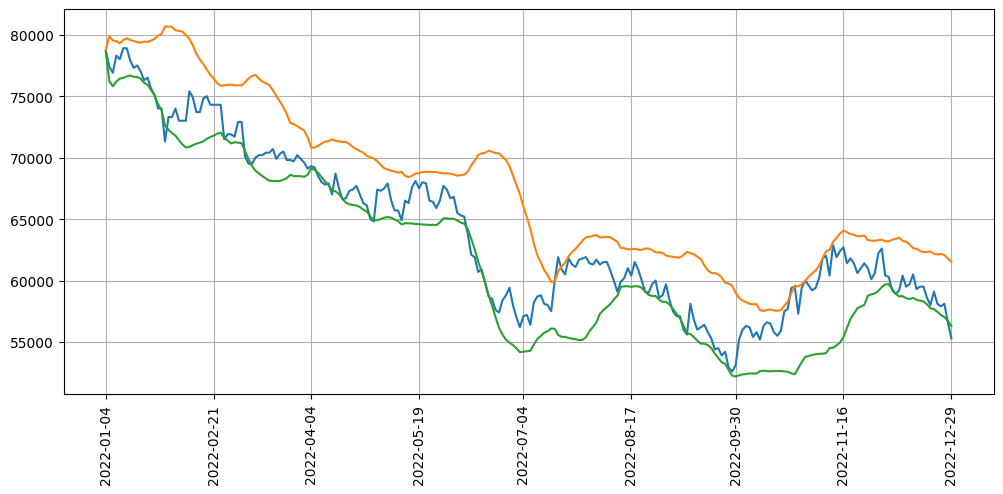

In [347]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Close'])
plt.plot(data.index, data['Upper Band'])
plt.plot(data.index, data['Lower Band'])
plt.grid()
plt.xticks(rotation=90)
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))
plt.show()

In [348]:
kospi = pdr.get_data_yahoo('^KS11', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [349]:
kospi.reset_index(inplace=True)
kospi['Date'] = kospi['Date'].dt.strftime('%Y-%m-%d')
kospi.set_index(kospi['Date'], inplace=True)
kospi.drop(['Date'], axis=1, inplace=True)

In [350]:
df = pd.concat([data, kospi['Close'].round(2)], axis=1)
df.columns = data.columns.append(pd.Index(['Kospi']))

In [351]:
df

,Open,High,Low,Close,Volume,Rate,MA_20,Upper Band,Lower Band,Kospi
Date,,,,,,,,,,
2022-01-04,78800.0,79200.0,78300.0,78700.0,12427416,-0.13,78700,78800.00,78600.00,2989.24
2022-01-05,78800.0,79000.0,76400.0,77400.0,25470640,-1.65,78050,79888.48,76211.52,2953.97
2022-01-06,76700.0,77600.0,76600.0,76900.0,12931954,-0.65,77666,79524.31,75807.69,2920.53
2022-01-07,78100.0,78400.0,77400.0,78300.0,15163757,1.82,77825,79469.18,76180.82,2954.89
2022-01-10,78100.0,78100.0,77100.0,78000.0,9947422,-0.38,77860,79292.48,76427.52,2926.72
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,58200.0,58400.0,57700.0,58100.0,9829407,-1.69,59785,62120.33,57449.67,2313.69
2022-12-26,58000.0,58100.0,57700.0,57900.0,6756411,-0.34,59675,62150.88,57199.12,2317.14
2022-12-27,58000.0,58400.0,57900.0,58100.0,10667027,0.35,59550,62081.07,57018.93,2332.79
